This notebook shows the plots which compare 2005 UD with other asteroids, meteorites, and lunar samples.

In [1]:
%config InlineBackend.figure_format = 'retina'
InteractiveShell.ast_node_interactivity = 'last_expr'     

In [2]:
from pathlib import Path

from matplotlib import pyplot as plt
from matplotlib import rcParams
import matplotlib.ticker as ticker

import pandas as pd
import numpy as np

from io import StringIO
import numpy as np
import pandas as pd
# from scipy.optimize import curve_fit
import ysvisutilpy as yvu


uddata = StringIO('''h h_err a0 a0_err Pmin Pmin_err
0.199 0.005 19.97 0.18 -1.11 0.05
0.192 0.002 19.72 0.09 -1.11 0.02
''')
# the bound (c1/c2 positive) and unbound (allowed negative) results.

uddata = pd.read_csv(uddata, sep=' ')
bennu = pd.DataFrame(data=[[0.276, 0.012, 17.88, 0.40, -1.43, 0.14]], 
                     columns=['h', 'h_err', 'a0', 'a0_err', 'Pmin', 'Pmin_err'])

FIGDIR = Path("figs")
DATADIR = Path("../data")
DATADIR2 = Path("../../../__secured_data")  # Data by courtesy of I. Belskaya (to M. Ishiguro)

poltab = pd.read_csv(DATADIR / "GeakeJE+DollfusA1986MNRAS_Tab1-7.csv")
dg_ptab = poltab.groupby("category")
categs = list(dg_ptab.groups.keys())

In [3]:
# We need to do it in a separate cell. See:
# https://github.com/jupyter/notebook/issues/3385
plt.style.use('default')
rcParams.update({'font.size':12})

In [4]:
_df1 = pd.read_csv(DATADIR2/"Belskaya_dataPminAlpha_BCFG.DAT", sep='\t',
                   names=["num", "name", "a0", "a0_err", "Pmin", "Pmin_err", "type"])
_df2 = pd.read_csv(DATADIR2/"Belskaya_dataPminAlpha_others.DAT", sep='\t',
                   names=["num", "name", "a0", "a0_err", "Pmin", "Pmin_err", "type"])
df_Bel = pd.concat([_df1, _df2])
df_Bel["Pmin"] *= -1

df_gd86 = pd.read_csv(DATADIR/"GeakeJE+DollfusA1986MNRAS_Tab1-7.csv")
df_l = df_gd86.loc[(df_gd86['category'].str.startswith("Lunar"))]
df_m1 = df_gd86.loc[(
    (df_gd86['category'] == 'Meteoritic Powder')
   &(df_gd86['type_original'].str.startswith('C'))
)]

df_m2 = pd.read_csv(DATADIR/"1977LPSC....8.1091Z.csv")
df_m2 = df_m2.loc[(
    (df_m2["description"].str.contains("Chondrite", na=False))
   &(df_m2["Filter"].isin(["O (0.585)", "G"]))
)]

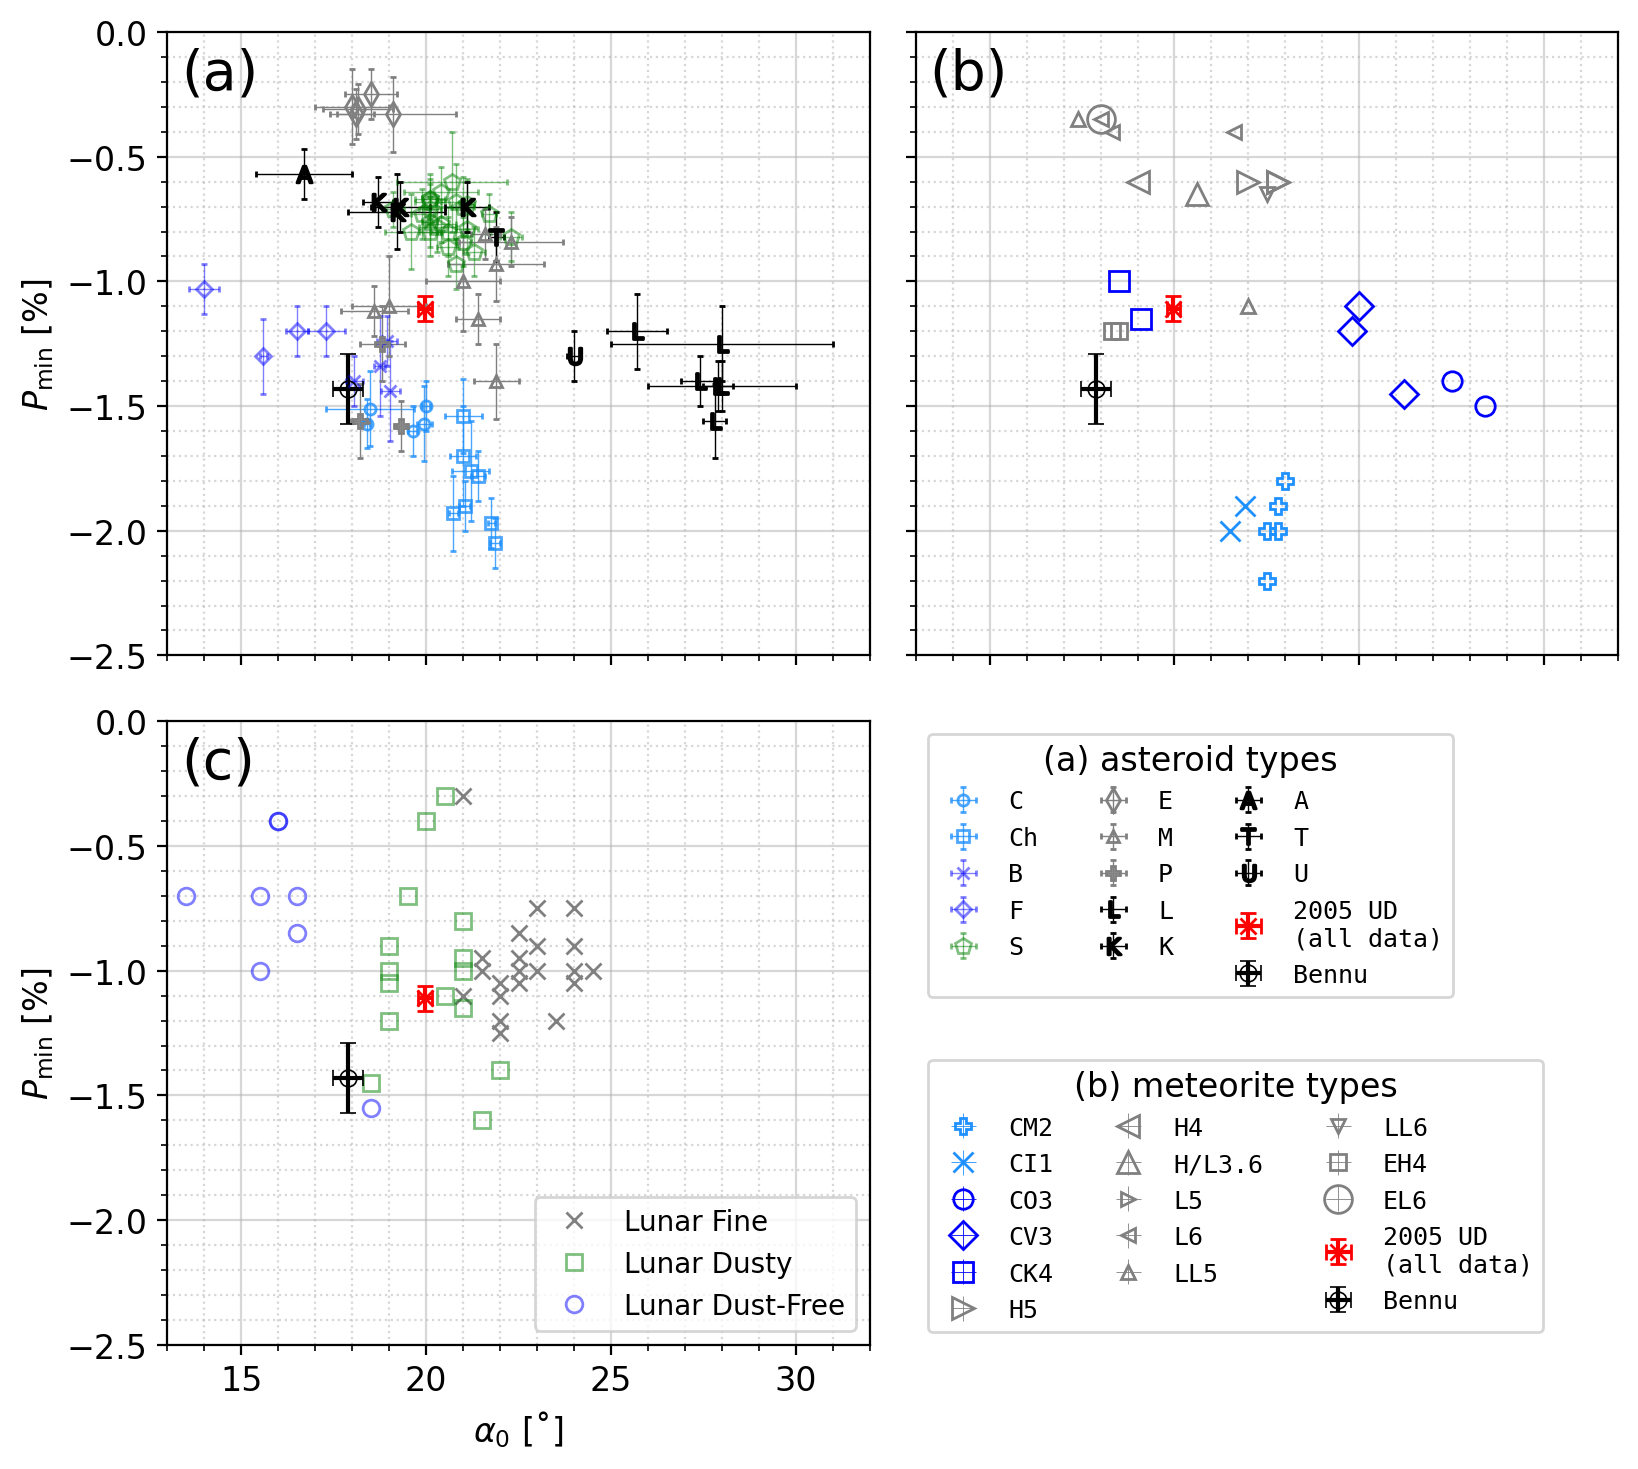

In [5]:
kws_a = {
    "C":  dict(marker='o', mfc='none', ms=4, color='dodgerblue', alpha=0.8),
    "Ch": dict(marker='s', mfc='none', ms=4, color='dodgerblue', alpha=0.8),
    "B":  dict(marker='x', mfc='none', ms=4, color='b', alpha=0.5),
    "F":  dict(marker='D', mfc='none', ms=4, color='b', alpha=0.5),
    "S":  dict(marker='p', mfc='none', ms=6, color='g', alpha=0.5),
#     "E":  dict(marker='d', mfc='none', ms=4, color='chocolate', alpha=0.8),
#     "M":  dict(marker='^', mfc='none', ms=4, color='darkorange', alpha=1),
#     "P":  dict(marker='4', mfc='none', ms=8, color='tomato'),
#     "L":  dict(marker='1', mfc='none', ms=8, color='g'),
    "E":  dict(marker='d', mfc='none', ms=6, color='gray'),
    "M":  dict(marker='^', mfc='none', ms=4, color='gray'),
    "P":  dict(marker='P', mfc='none', ms=5, color='gray'),
    "L":  dict(marker='$\mathrm{L}$', mfc='none', ms=6, color='k'),
    "K":  dict(marker='$\mathrm{K}$', mfc='none', ms=6, color='k'),
    "A":  dict(marker='$\mathrm{A}$', mfc='none', ms=6, color='k'),
    "T":  dict(marker='$\mathrm{T}$', mfc='none', ms=6, color='k'),
    "U":  dict(marker='$\mathrm{U}$', mfc='none', ms=6, color='k'),
}

kws_m = {
# CC
    "CM2": dict(marker='P', mfc='none', ms=6, color='dodgerblue'),
    "CI1": dict(marker='x', mfc='none', ms=7, color='dodgerblue'),
    "CO3": dict(marker='o', mfc='none', ms=7, color='b'),
    "CV3": dict(marker='D', mfc='none', ms=7, color='b'),
    "CK4": dict(marker='s', mfc='none', ms=7, color='b'),
# etc (OC)
    "H5":  dict(marker='>', mfc='none', ms=8, color='gray'),
    "H4":  dict(marker='<' , mfc='none', ms=8, color='gray'),
    "H/L3.6": dict(marker='^', mfc='none', ms=8, color='gray'),
    "L5":  dict(marker='>' , mfc='none', ms=5, color='gray'),
    "L6":  dict(marker='<', mfc='none', ms=5, color='gray'),
    "LL5": dict(marker='^', mfc='none', ms=5, color='gray'),
    "LL6": dict(marker='v', mfc='none', ms=5, color='gray'),
    "EH4": dict(marker='s', mfc='none', ms=6, color='gray'),
    "EL6": dict(marker='o', mfc='none', ms=10, color='gray'),
}

kws_l = {
    'Lunar Fine':      dict(marker='x', mfc='none', ms=6, color='gray'),
    'Lunar Dusty':     dict(marker='s', mfc='none', ms=6, color='g', alpha=0.5),
    'Lunar Dust-Free': dict(marker='o', mfc='none', ms=6, color='b', alpha=0.5)
}

udkw1 = dict(marker='x', color='r', mfc='none', ms=6, mew=1., ls='', capsize=3, alpha=1)
udkw2 = dict(marker='s', color='r', mfc='none', ms=6, mew=1., ls='', capsize=3, alpha=1)
bnkw = dict(marker='o', color='k', mfc='none', ms=6, mew=0.6, ls='', capsize=3, alpha=1)
errbfmt = dict(ls='', capsize=1, elinewidth=0.5)
nanpos = dict(x=np.nan, y=np.nan, xerr=np.nan, yerr=np.nan)

fig, axs = plt.subplots(2, 2, figsize=(8.5, 7.5), 
                        sharex=True, sharey=True, gridspec_kw=None)
axa = axs[0, 0]  # asteroids
axm = axs[0, 1]  # meteorites
axl = axs[1, 0]  # lunar

_ax1 = axs[1, 1]
_ax2 = axs[1, 1].twinx()  # Fake axes


xval, yval = "a0", "Pmin"
for t, kw in kws_a.items():
    df = df_Bel.loc[df_Bel["type"] == t]
    axa.errorbar(
        df[xval], df[yval], **errbfmt, **kw,
        xerr=df[f"{xval}_err"], yerr=df[f"{yval}_err"]
    )    
    _ax1.errorbar(**nanpos, **errbfmt, **kw, label=t)

for t, kw in kws_m.items():
    df1 = df_m1.loc[df_m1["type"] == t]
    df2 = df_m2.loc[df_m2["type"] == t]
    axm.plot(df1[xval], df1[yval], ls='', **kw)
    axm.plot(df2[xval], df2[yval], ls='', **kw)
    _ax2.errorbar(**nanpos, **kw, ls='', elinewidth=0.3, label=t)
    # For triangular markers, center is difficult to know, 
    # so I put ``+'' like grid to legend by using errorbar

for t, kw in kws_l.items():
    df = df_l.loc[df_l["category"] == t]
    axl.plot(df[xval], df[yval], ls='', **kw, label=t)
axl.legend(loc=4, fontsize=10)
    
abc = ['(a)', '(b)', '(c)']
for i, ax in enumerate([axa, axm, axl]):
    ax.errorbar(uddata[xval][0], uddata[yval][0], **udkw1,
                xerr=uddata[f"{xval}_err"][0], yerr=uddata[f"{yval}_err"][0])
#     ax.errorbar(uddata[xval][1], uddata[yval][1], **udkw2,
#                 xerr=uddata[f"{xval}_err"][1], yerr=uddata[f"{yval}_err"][1])
    ax.errorbar(bennu[xval], bennu[yval], **bnkw,
                xerr=bennu[f"{xval}_err"], yerr=bennu[f"{yval}_err"])
    ax.text(0.02, 0.91, abc[i], transform=ax.transAxes, fontsize=20)
    
for aa in [_ax1, _ax2]:
    aa.axis('off')
    aa.errorbar(**nanpos, **udkw1, label="2005 UD\n(all data)")
#     aa.errorbar(**nanpos, **udkw2, label="2005 UD\n(unbound)")
    aa.errorbar(**nanpos, **bnkw, label="Bennu")

axa.set(ylabel=r"$P_\mathrm{min}$ [%]", ylim=(-2.5, 0), xlim=(13, 32))
axl.set(ylabel=r"$P_\mathrm{min}$ [%]", xlabel=r"$\alpha_0$ [˚]")
_ax1.legend(loc=2, ncol=3, fontsize=9, title="(a) asteroid types", prop={'family': 'monospace', 'size': 9})
_ax2.legend(loc=3, ncol=3, fontsize=9, title="(b) meteorite types", prop={'family': 'monospace', 'size': 9})

yvu.linticker([axa, axm, axl], xmajlockws=5, xminlockws=1, ymajlockws=0.5, yminlockws=0.1)
plt.tight_layout()
fig.align_ylabels(axs)
fig.align_xlabels(axs)
plt.savefig(FIGDIR/"a0-Pmin.pdf")
plt.show();

Using $\lg p_V = C_1 \lg h + C_2$ with Lupishko 2018 ($C_1 = -0.989$, $C_2 = -1.719$ without error-bars)

In [6]:
C1, C2 = -0.989, -1.719
pV_phae = np.array([0.08, 0.12])  # rough min/max
h_phae = 10**((np.log10(pV_phae) - C2) / C1)
h_phae

array([0.23495837, 0.1559341 ])

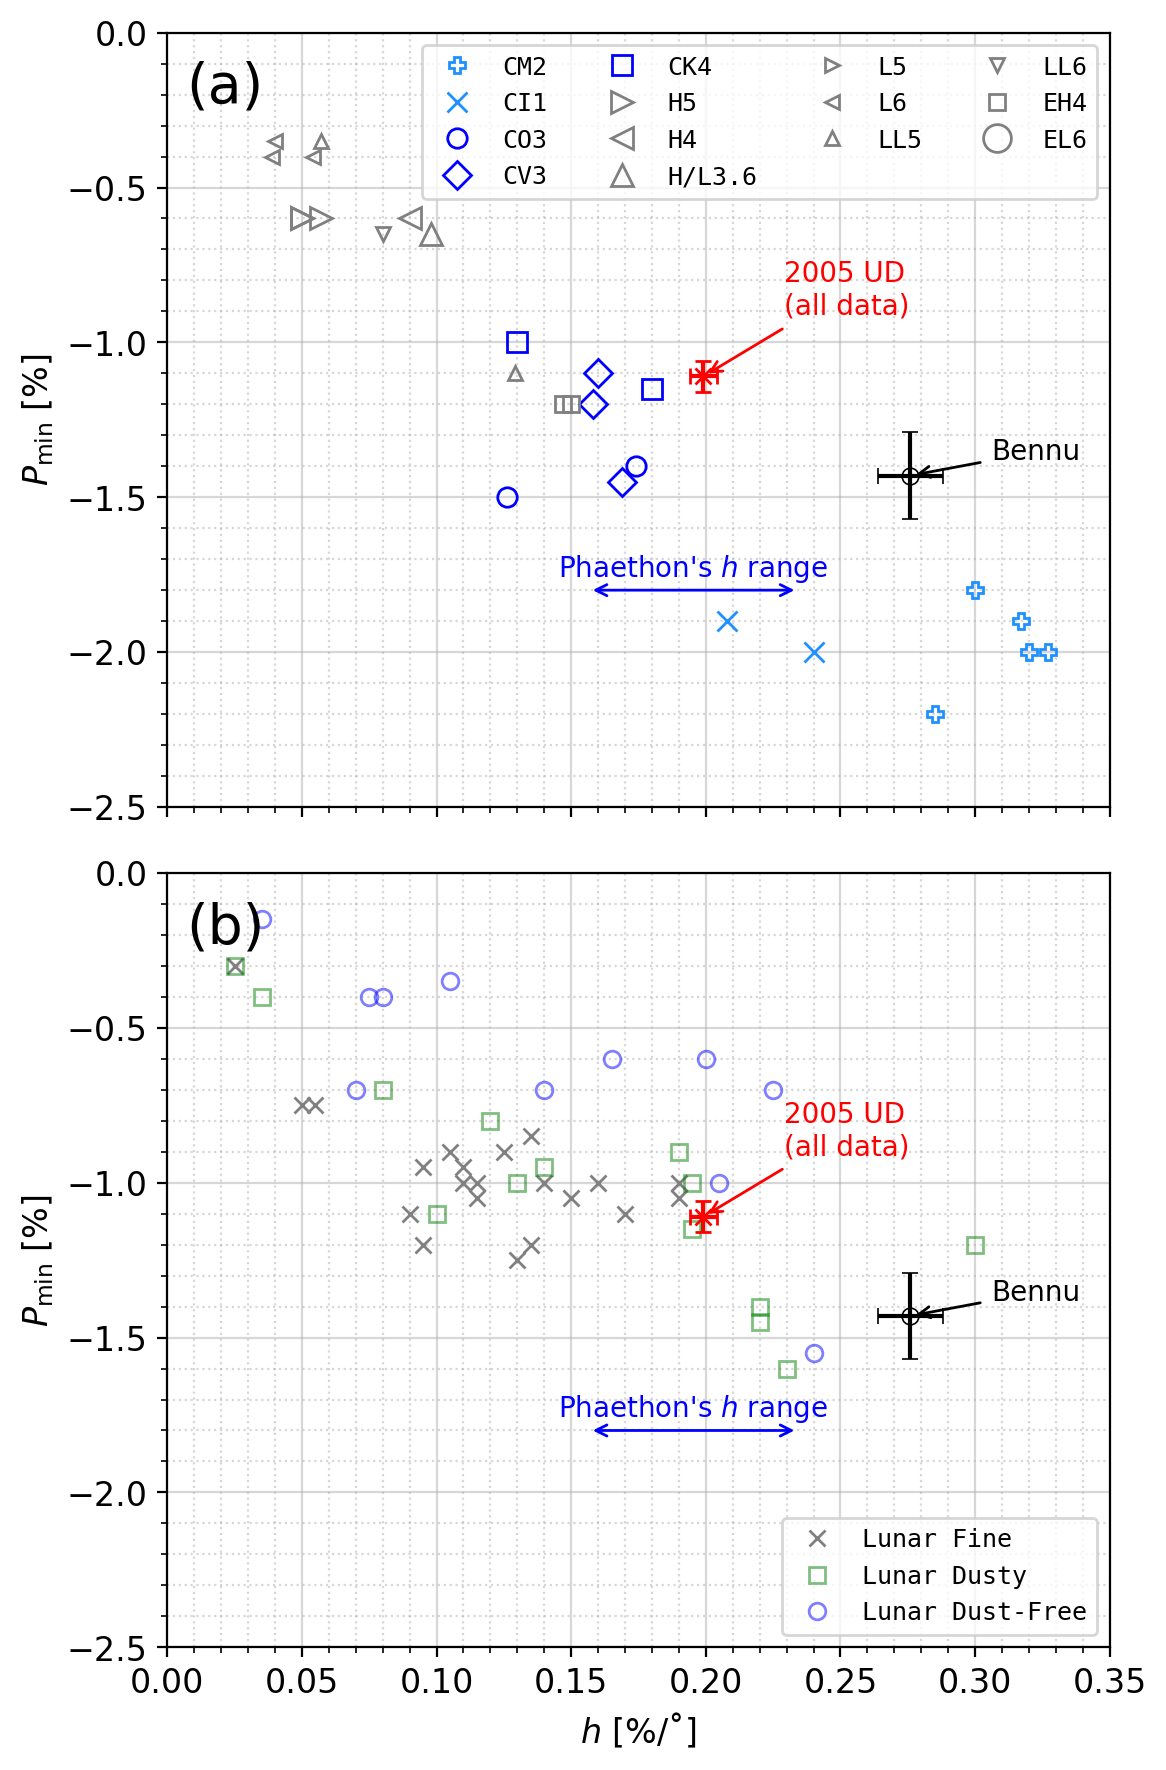

In [7]:
fig, axs = plt.subplots(2, 1, figsize=(6., 9), 
                        sharex=True, sharey=True, gridspec_kw=None)

axm = axs[0]  # meteorites
axl = axs[1]  # lunar

xval, yval = "h", "Pmin"
for t, kw in kws_m.items():
    df1 = df_m1.loc[df_m1["type"] == t]
    df2 = df_m2.loc[df_m2["type"] == t]
    axm.plot(df1[xval], df1[yval], ls='', **kw, label=t)
    axm.plot(df2[xval], df2[yval], ls='', **kw)
    # For triangular markers, center is difficult to know so I put ``+'' like grid to legend by using errorbar

for t, kw in kws_l.items():
    df = df_l.loc[df_l["category"] == t]
#     axl.plot(df[xval], df[yval], ls='', **kw, label=t.split(' ')[1])
    axl.plot(df[xval], df[yval], ls='', **kw, label=t)

annotkw1 = dict(color='r', fontsize=10, xycoords='data', 
                arrowprops=dict(arrowstyle="->", color='r'))
annotkw2 = dict(color='k', fontsize=10, xycoords='data', 
                arrowprops=dict(arrowstyle="->", color='k'))
annotkw3 = dict(color='b', fontsize=10, xycoords='data', 
                arrowprops=dict(arrowstyle="<->", color='b'))

for i, ax in enumerate([axm, axl]):
    ax.errorbar(uddata[xval][0], uddata[yval][0], **udkw1,
                xerr=uddata[f"{xval}_err"][0], yerr=uddata[f"{yval}_err"][0])
#     ax.errorbar(uddata[xval][1], uddata[yval][1], **udkw2,
#                 xerr=uddata[f"{xval}_err"][1], yerr=uddata[f"{yval}_err"][1])
    ax.errorbar(bennu[xval], bennu[yval], **bnkw,
                xerr=bennu[f"{xval}_err"], yerr=bennu[f"{yval}_err"])
    ax.annotate(
        "2005 UD\n(all data)", 
        xy=(uddata[xval][0], uddata[yval][0]),
        xytext=(uddata[xval][0] + 0.03, uddata[yval][0] + 0.2),
        **annotkw1,
    )
#     ax.annotate(
#         "2005 UD\n(unbound)", 
#         xy=(uddata[xval][1], uddata[yval][1]),
#         xytext=(uddata[xval][1] - 0.04, uddata[yval][1] - 0.4),
#         **annotkw1,
#         horizontalalignment='right'
#     )
    ax.annotate(
        "Bennu", 
        xy=(bennu[xval], bennu[yval]),
        xytext=(bennu[xval] + 0.03, bennu[yval] + 0.05),
        **annotkw2
    )
    ax.annotate(
        '',
        xy=(min(h_phae), -1.8),
        xytext=(max(h_phae), -1.8),
        color='b', fontsize=10, xycoords='data', 
        arrowprops=dict(arrowstyle="<->", color='b')
    )
    ax.annotate(
        "Phaethon's $h$ range",
        xy=(np.mean(h_phae), -1.8),
        horizontalalignment='center',
        xytext=(0, 5),
        color='b', fontsize=10, xycoords='data', 
        textcoords='offset points',
#         arrowprops=dict(arrowstyle="", color='b')
    )
    ax.text(0.02, 0.91, abc[i], transform=ax.transAxes, fontsize=20)
    
axm.legend(loc=1, ncol=4, prop={'family': 'monospace', 'size': 9})
axl.legend(loc=4, ncol=1, prop={'family': 'monospace', 'size': 9})
# axm.legend(bbox_to_anchor=(1, 1), fontsize=10)
# axl.legend(bbox_to_anchor=(1, 1), fontsize=10)

axm.set(ylabel=r"$P_\mathrm{min}$ [%]", ylim=(-2.5, 0), xlim=(0, 0.35))
axl.set(ylabel=r"$P_\mathrm{min}$ [%]", xlabel=r"$h$ [%/˚]", xlim=(0, 0.35))

yvu.linticker([axm, axl], xmajlockws=0.05, xminlockws=0.01, ymajlockws=0.5, yminlockws=0.1)

plt.tight_layout()
fig.align_ylabels(axs)
fig.align_xlabels(axs)
plt.savefig(FIGDIR/"h-Pmin.pdf")
plt.show()

## Pmax-A5 chart
Below is the comparison between the lab samples and asteroids, on the Pmax-A5 chart.

See [this Notebook](https://nbviewer.jupyter.org/github/ysBach/KMTNet_Toutatis/blob/master/Notebooks/05_polarimetry_plot.ipynb) of [Bach+2019](https://ui.adsabs.harvard.edu/abs/2019JKAS...52...71B/abstract) for some detailed discussions on this plot (full notebooks available via their [Appendix B](https://github.com/ysBach/KMTNet_Toutatis)).
  * Note: Original data from [Geake + Dollfus 1986](https://ui.adsabs.harvard.edu/abs/1986MNRAS.218...75G/abstract)

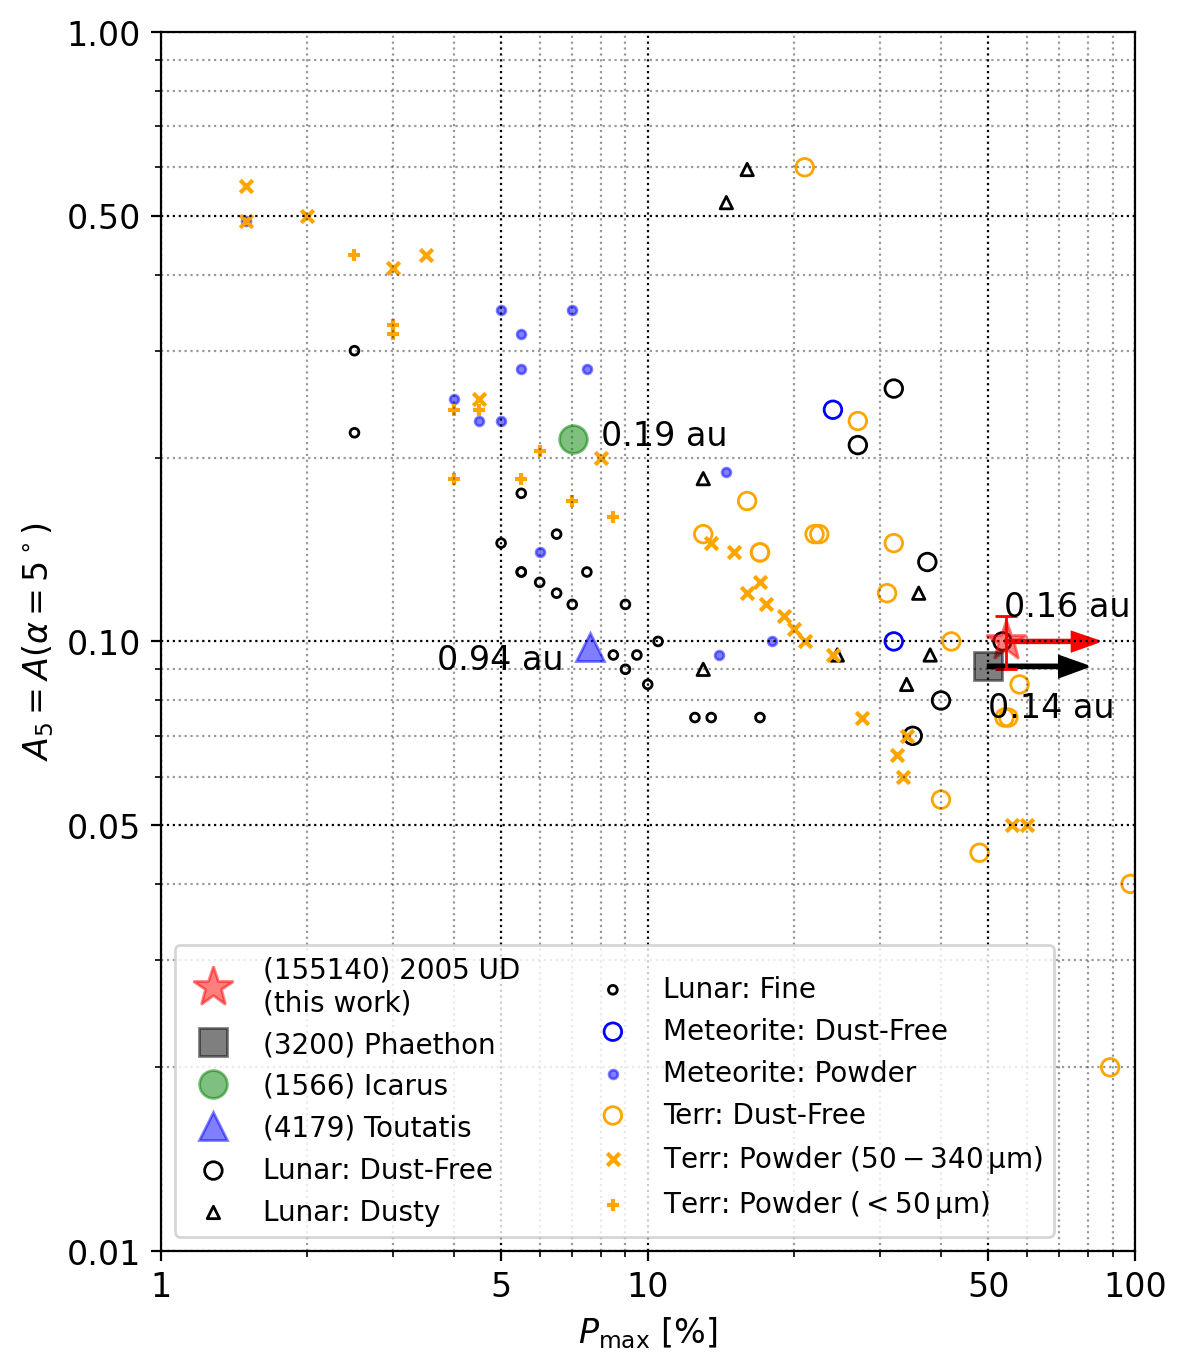

In [8]:
Afmter = ticker.FormatStrFormatter("%.2f")
Pfmter = ticker.FormatStrFormatter("%.0f")

size = 40

markers = {"Lunar Dust-Free":
               dict(marker='o', s=size, edgecolors='k', facecolors='none',
                    label="Lunar: Dust-Free"),
           "Lunar Dusty":
               dict(marker='^', s=size/2, edgecolors='k', facecolors='none',
                    label="Lunar: Dusty"),
           "Lunar Fine":
               dict(marker='.', s=size, edgecolors='k', facecolors='none', 
                    label="Lunar: Fine"),
           "Meteorite Dust-Free":
               dict(marker='o', s=size, edgecolors='b', facecolors='none',
                    label="Meteorite: Dust-Free"),
           "Meteoritic Powder":
               dict(marker='.', s=size, c='b', alpha=0.5, 
                    label="Meteorite: Powder"),
           "Rock Dust-Free":
               dict(marker='o', s=size, edgecolors='orange', facecolors='none',
                    label="Terr: Dust-Free"),
           "Rock Powder 340":
               dict(marker='x', s=size/2, c='orange', 
                    label="Terr: Powder ($50 - 340 \,\mathrm{\mu m}$)"),
           "Rock Powder 50":
               dict(marker='+', s=size/2, c='orange',
                    label="Terr: Powder ($< 50 \,\mathrm{\mu m}$)")
           }

plt.close('all')
fig, ax = plt.subplots(1, 1, figsize=(6.1, 7))

for categ, group in dg_ptab:
    ax.scatter(group["Pmax"], group["A5"], **markers[categ])

ax.plot(54.33, 0.10, marker='*', color='r', ms=15,
        ls='', alpha=0.5, label="(155140) 2005 UD \n(this work)")
ax.errorbar(54.33, 0.10, yerr=[[0.01], [0.01]], marker=None, color='r', ms=10,
            ls='', elinewidth=1, capsize=4, label=None)
ax.arrow(54.33, 0.10, dx=20, dy=0, head_width=0.007, head_length=10, fc='r', ec='r')
ax.text(54, 0.11, "0.16 au")

ax.plot(50, 0.091, marker='s', color='k', ms=10,
        ls='', alpha=0.5, label="(3200) Phaethon")
ax.arrow(50, 0.091, dx=20, dy=0, head_width=0.007, head_length=10, fc='k', ec='k')
ax.text(50, 0.075, "0.14 au")

ax.plot(7.04, 0.215, marker='o', color='g', ms=10,
        ls='', alpha=0.5, label="(1566) Icarus")
ax.text(8, 0.21, "0.19 au")

ax.plot(7.6, 0.098, marker='^', color='b', ms=10,
        ls='', alpha=0.5, label="(4179) Toutatis")
ax.text(3.7, 0.09, "0.94 au")


ax.set_yscale('log')
ax.set_xscale('log')
ax.set_ylim(0.01, 1)
ax.set_xlim(1, 100)

ax.set_xticks([1, 5, 10, 50, 100])
ax.xaxis.set_major_formatter(Pfmter)

ax.set_yticks([0.01, 0.05, 0.10, 0.50, 1.])
ax.yaxis.set_major_formatter(Afmter)
ax.grid(which='both', ls=':', color='k', alpha=0.4)
ax.grid(which='major', ls=':', color='k', alpha=1)
ax.set_xlabel(r"$ P_\mathrm{max} $ [%]")
ax.set_ylabel(r"$ A_5 = A(\alpha = 5^\circ) $")

ax.legend(fontsize=10, ncol=2)

plt.tight_layout()
plt.savefig(FIGDIR/"fig_Pmax-A5.pdf")

## Albedo from h
The albedo estimation from the h values from four cases: using only the data in this work or all data (incl. Devogele+20 & unpublished) and bound or unbound. 

The equation used is
$$ 
\log_{10}(p_\mathrm{V}) = C_1 \log_{10} h + C_2 ~~,
$$
and its error is estimated by
$$
\Delta p_\mathrm{V} 
  \approx p_\mathrm{V} \ln 10 
    \sqrt{ 
      (\log_{10}h \Delta C_1)^2 
      + (\Delta C_2)^2
      + \left( \frac{C_1 \Delta h}{h \ln 10} \right)^2
    }
$$    
The h and its error are from MC (Monte Carlo), not the LS (least-square). 

In [10]:
#      only this work  | all data
#      bound | unbound | bound | unbound
hs  = [0.201 , 0.174   , 0.199 , 0.192]
dhs = [0.007 , 0.007   , 0.002 , 0.002]
hs = np.array(hs)
dhs = np.array(dhs)

#      Cellino+15  Lupishko+18  Masiero+12
c1s  = [-1.111   , -0.989     , -1.207]
c2s  = [-1.781   , -1.719     , -1.892]
dc1s = [0.031    , 0.047      , 0.067]
dc2s = [0.025    , 0.040      , 0.141]

models = ["Cellino+15", "Lupishko+18", "Masiero+12"]
lg = lambda x: np.log10(x)
ln10 = np.log(10)
allalbs = []

for model, c1, c2, dc1, dc2 in zip(models, c1s, c2s, dc1s, dc2s):
    print(f"{model} ({c1} +- {dc1} | {c2} +- {dc2})")
    albs = 10**(c1*lg(hs) + c2)
    dalbs = albs*ln10*np.sqrt((lg(hs)*dc1)**2 + (dc2)**2 + ((c1*dhs)/(hs*ln10))**2)
    strs = []
    for alb, dalb in zip(albs, dalbs):
        strs.append(f"$ {alb:.3f} \pm {dalb:.3f} $")
        if model != "Masiero+12":
            allalbs.append(alb)
    print(" & ".join(strs) + r" \\")


Cellino+15 (-1.111 +- 0.031 | -1.781 +- 0.025)
$ 0.098 \pm 0.008 $ & $ 0.116 \pm 0.010 $ & $ 0.100 \pm 0.008 $ & $ 0.104 \pm 0.008 $ \\
Lupishko+18 (-0.989 +- 0.047 | -1.719 +- 0.04)
$ 0.093 \pm 0.012 $ & $ 0.108 \pm 0.014 $ & $ 0.094 \pm 0.011 $ & $ 0.098 \pm 0.012 $ \\
Masiero+12 (-1.207 +- 0.067 | -1.892 +- 0.141)
$ 0.089 \pm 0.031 $ & $ 0.106 \pm 0.037 $ & $ 0.090 \pm 0.031 $ & $ 0.094 \pm 0.032 $ \\


In [11]:
H_V = 17.54  # ± 0.02
ps = np.array([np.array(allalbs).min(), np.array(allalbs).max()])
print(1329/np.sqrt(ps)*10**(-H_V/5), ps)

[1.35037824 1.21380826] [0.09335533 0.11554464]
